In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import plot_heatmap

In [2]:
df = pd.read_csv('gt_2015.csv')

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [4]:
df.describe().drop('count')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


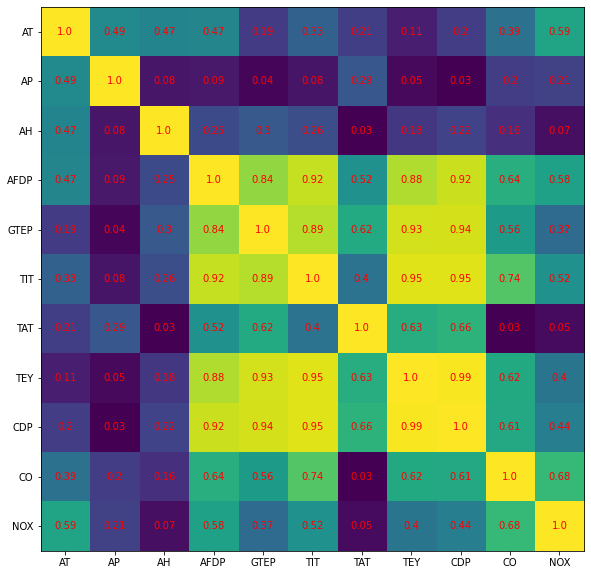

In [5]:
# Plot absolute correlation to see which features might depend on eachother
plot_heatmap(df)

In [6]:
from sklearn.preprocessing import RobustScaler

In [7]:
scaler = RobustScaler()
norm_array = scaler.fit_transform(df)
df_norm = pd.DataFrame(norm_array, columns=df.columns)

In [8]:
df_norm.describe().drop('count')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
mean,-1.833570e-02,0.059027,-1.140492e-01,0.056063,1.163032e-01,-0.045079,-0.582587,0.114488,0.097503,0.314925,2.404246e-01
std,6.419366e-01,0.799470,6.701367e-01,0.566322,6.510805e-01,0.672192,1.039104,0.773940,0.675643,1.179789,8.769690e-01
min,-1.878547e+00,-2.852174,-2.319402e+00,-1.085543,-1.110860e+00,-2.187075,-6.375769,-1.510643,-1.225858,-1.224995,-2.436812e+00
25%,-5.061452e-01,-0.501449,-5.693589e-01,-0.390896,-3.178461e-01,-0.333333,-0.941316,-0.255680,-0.277753,-0.382831,-3.497253e-01
50%,1.408514e-16,0.000000,3.516406e-16,0.000000,2.585145e-16,0.000000,0.000000,0.000000,0.000000,0.000000,2.798665e-16
75%,4.938548e-01,0.498551,4.306411e-01,0.609104,6.821539e-01,0.666667,0.058684,0.744320,0.722247,0.617169,6.502747e-01
max,1.557824e+00,2.620290,1.272561e+00,1.578618,2.239039e+00,0.683673,0.164695,2.291318,1.917670,20.356899,4.950391e+00


In [9]:
from helper_functions import linear_models

In [10]:
results = linear_models(df_norm)
for key in results:
    print(key)
    print(results[key]['score'])

AT
0.9046294788350057
AP
0.4501323975886342
AH
0.5203454606040522
AFDP
0.9504541417468511
GTEP
0.904211198349484
TIT
0.9978815028513165
TAT
0.9864395218398636
TEY
0.9961390848602458
CDP
0.9982966116759746
CO
0.7322063104288994
NOX
0.6630350829070697


In [11]:
filtered_results = {key:result for key, result in results.items() if result['score']>=0.95 }

In [12]:
for key in filtered_results:
    print(key)

AFDP
TIT
TAT
TEY
CDP


In [13]:
# Determine which features can be easily predicted by the others
# Eliminate just CDP, then TEY, then TIT as well
df_trimmed = df_norm.drop(['CDP', 'TEY', 'TIT'], axis=1)
trimmed_results = linear_models(df_trimmed)
for key in trimmed_results:
    print(key)
    score = (trimmed_results[key]['score'])
    print(score)
    if score >= 0.95:
        print(trimmed_results[key]['coefficients'])

AT
0.7979563869215537
AP
0.39371300928366815
AH
0.49725814795643974
AFDP
0.8815860544163904
GTEP
0.8402952532696133
TAT
0.6201927319302492
CO
0.7063941684181746
NOX
0.660157530038102


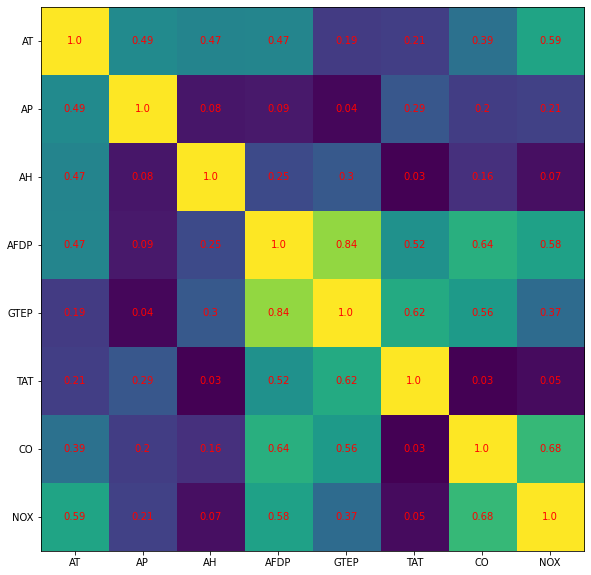

In [14]:
plot_heatmap(df_trimmed)

In [15]:
from statsmodels.api import OLS

In [16]:
linear = OLS(df_norm['TIT'], df_trimmed, hasconst=False)
result = linear.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TIT   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          1.951e+04
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        0.00
Time:                        17:39:02   Log-Likelihood:                          3878.8
No. Observations:                7384   AIC:                                     -7742.
Df Residuals:                    7376   BIC:                                     -7686.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
linear = OLS(df_norm['CDP'], df_trimmed, hasconst=False)
result = linear.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    CDP   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          2.849e+04
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        0.00
Time:                        17:39:02   Log-Likelihood:                          5126.1
No. Observations:                7384   AIC:                                 -1.024e+04
Df Residuals:                    7376   BIC:                                 -1.018e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
linear = OLS(df_norm['TEY'], df_trimmed, hasconst=False)
result = linear.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          2.228e+04
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        0.00
Time:                        17:39:02   Log-Likelihood:                          3243.8
No. Observations:                7384   AIC:                                     -6472.
Df Residuals:                    7376   BIC:                                     -6416.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------